# 可視化

In [5]:
# 1. ライブラリのインポート
# vscodeで実行する場合にはipykernelパッケージが必要

import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
import statsmodels.api as sm
import japanize_matplotlib
import matplotlib.pyplot as plt

In [6]:
# 2. グラフの設定

plt.style.use('fast') # スタイルの設定
plt.rcParams['figure.figsize'] = [9, 5] # サイズの設定

In [7]:
# 3. DataFrameの作成

file_path = "../data/BloodDonation.csv"
df = pd.read_csv(file_path)

# date列を作成
df['date'] = pd.to_datetime((df['year'].astype(str)) + '-' + (df['month'].astype(str)))
df.head()

,year,month,prefecture_id,blood_donors,whole_blood_donation,200mL_blood_donation,400mL_blood_donation,component_blood_donation,PPP_blood_donation,PC_blood_donation,date
0,2017,1,1,20934,17164,711,16453,3770,666,3104,2017-01-01
1,2017,1,2,4168,2997,89,2908,1171,331,840,2017-01-01
2,2017,1,3,3534,2583,139,2444,951,332,619,2017-01-01
3,2017,1,4,7301,4777,159,4618,2524,1761,763,2017-01-01
4,2017,1,5,3392,2446,4,2442,946,296,650,2017-01-01


### 献血方法別の献血者の割合

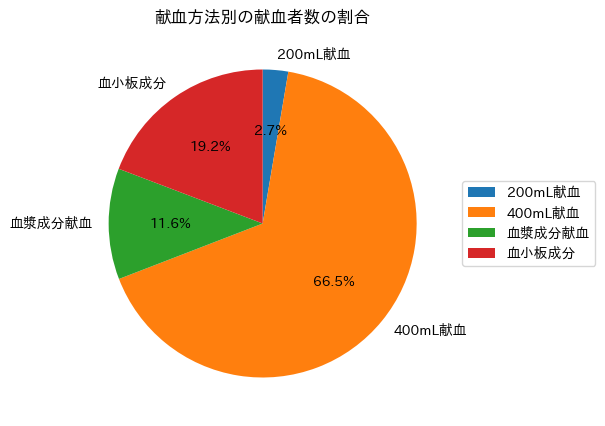

In [8]:
# dateごとに全国のblood_donorsでグループ化
grouped_date_total = df.groupby(['date'])['blood_donors'].sum().to_frame()

# 献血方法ごとの平均
bd_200 = df['200mL_blood_donation'].mean()
bd_400 = df['400mL_blood_donation'].mean()
bd_PPP = df['PPP_blood_donation'].mean()
bd_PC = df['PC_blood_donation'].mean()

# グラフ化
fig, ax = plt.subplots()
arr = np.array([bd_200, bd_400, bd_PC, bd_PPP])
label = ["200mL献血", "400mL献血", "血漿成分献血", "血小板成分"]

# ラベル
wedges, texts, autotexts = ax.pie(arr, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
ax.legend(wedges, label, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("献血方法別の献血者数の割合")
plt.show()

### 献血方法の総献血者数の推移

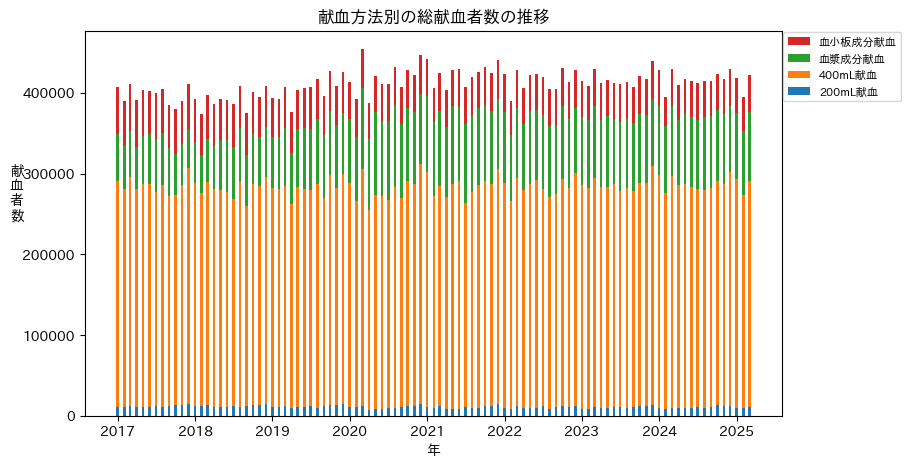

In [9]:
# dateごとに総和を求めグループ化
bd_200 = df.groupby(['date'])['200mL_blood_donation'].sum()
bd_400 = df.groupby(['date'])['400mL_blood_donation'].sum()
bd_PPP = df.groupby(['date'])['PPP_blood_donation'].sum()
bd_PC = df.groupby(['date'])['PC_blood_donation'].sum()

# グラフ化
fig, ax = plt.subplots()
x = df.groupby(['date'])['blood_donors'].sum().index
width = 12
bar_bd_200 = ax.bar(x, bd_200, width)
bar_bd_400 = ax.bar(x, bd_400, width, bottom=bd_200)
bar_bd_PPP = ax.bar(x, bd_PPP, width, bottom=bd_200+bd_400)
bar_bd_PC = ax.bar(x, bd_PC, width, bottom=bd_200+bd_400+bd_PPP)

plt.title("献血方法別の総献血者数の推移")
plt.xlabel("年")
plt.ylabel("献\n血\n者\n数", rotation=0)
plt.legend((bar_bd_PC[0], bar_bd_PPP[0], bar_bd_400[0], bar_bd_200[0]), ("血小板成分献血", "血漿成分献血", "400mL献血", "200mL献血"),
            bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=.1, fontsize=8)
plt.show()

### 総献血者数の推移

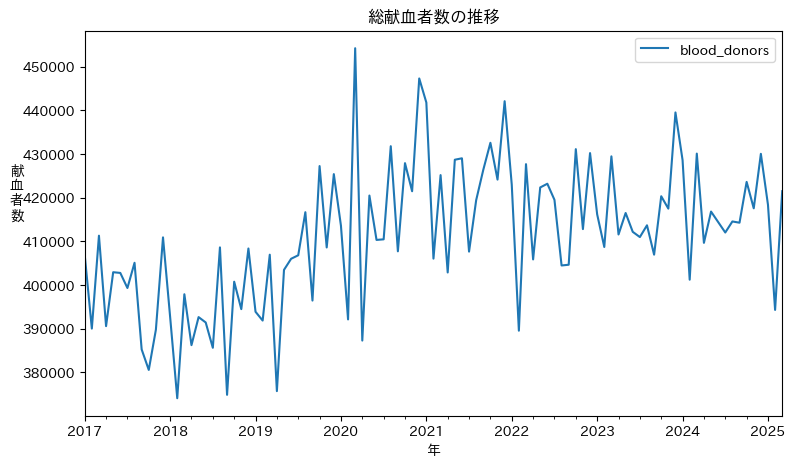

In [10]:
grouped_date_total.plot()

plt.title("総献血者数の推移")
plt.xlabel("年")
plt.ylabel("献\n血\n者\n数", rotation=0)
plt.show()

### 年ごとの総献血者数の推移

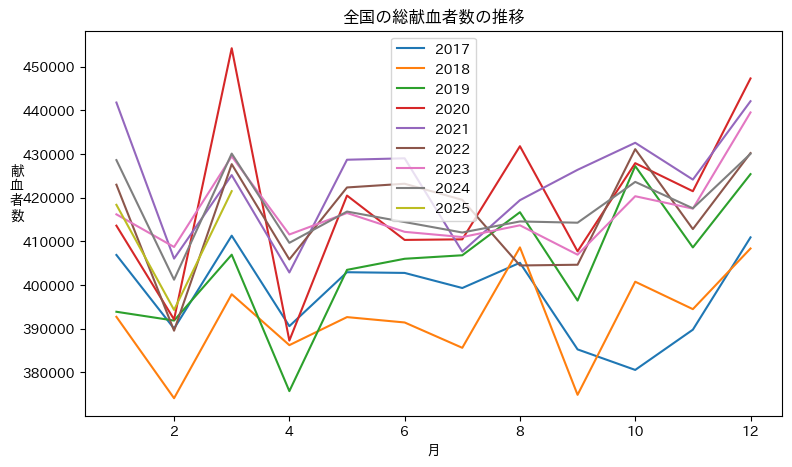

In [11]:
# year, month, blood_donorsの列を抽出
tmp_df = df[['year', 'month', 'blood_donors']]
grouped_month_total = tmp_df.groupby(['year', 'month']).sum().reset_index()

for year in grouped_month_total['year'].unique():
    plt.plot(
        grouped_month_total[grouped_month_total['year'] == year]['month'], 
        grouped_month_total[grouped_month_total['year'] == year]['blood_donors'], 
        label=str(year)
    )

# グラフ化
plt.title("全国の総献血者数の推移")
plt.xlabel("月")
plt.ylabel("献\n血\n者\n数", rotation=0)
plt.legend()
plt.show()

季節性が現れていることが読み取れる。

### 献血者数の分布

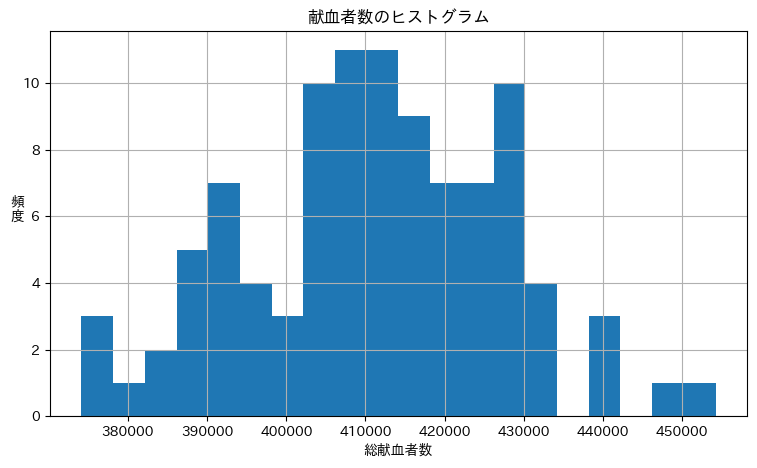

In [12]:
grouped_date_total.hist(bins=20)

plt.title("献血者数のヒストグラム")
plt.xlabel("総献血者数")
plt.ylabel("頻\n度", rotation=0)
plt.show()

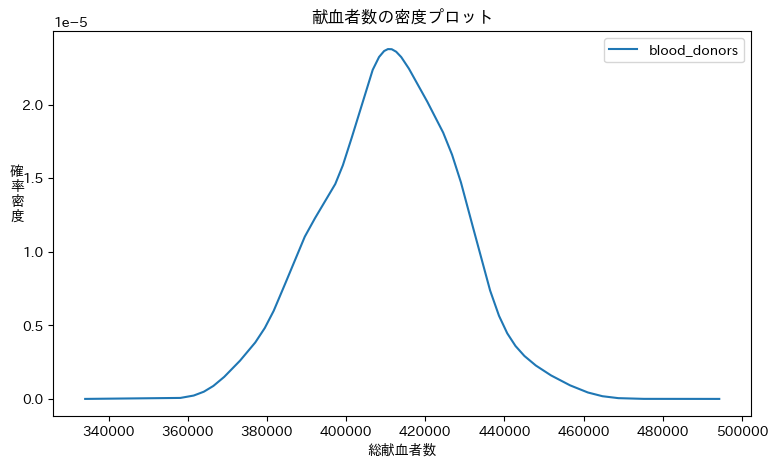

In [13]:
grouped_date_total.plot(kind='kde')

plt.title("献血者数の密度プロット")
plt.xlabel("総献血者数")
plt.ylabel("確\n率\n密\n度", rotation=0)
plt.show()

**密度プロット：**<br>
主に量的変数に対して、分布の形状をカーネル密度推定による曲線で表現するグラフ。<br>
ヒストグラムより滑らかに分布を表現することが可能だが、あくまでも推定結果であることに注意。<br>

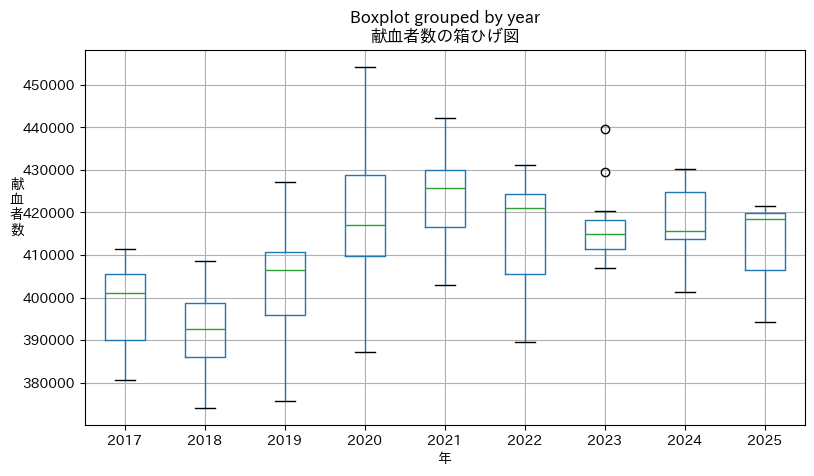

In [14]:
grouped_month_total.boxplot(column='blood_donors', by='year')

plt.title("献血者数の箱ひげ図")
plt.xlabel("年")
plt.ylabel("献\n血\n者\n数", rotation=0)
plt.show()

ラグ1 相関係数： 0.2625626549371037
ラグ2 相関係数： 0.48504038289255275
ラグ7 相関係数： 0.5533607565034312
ラグ12 相関係数： 0.6866353039654781


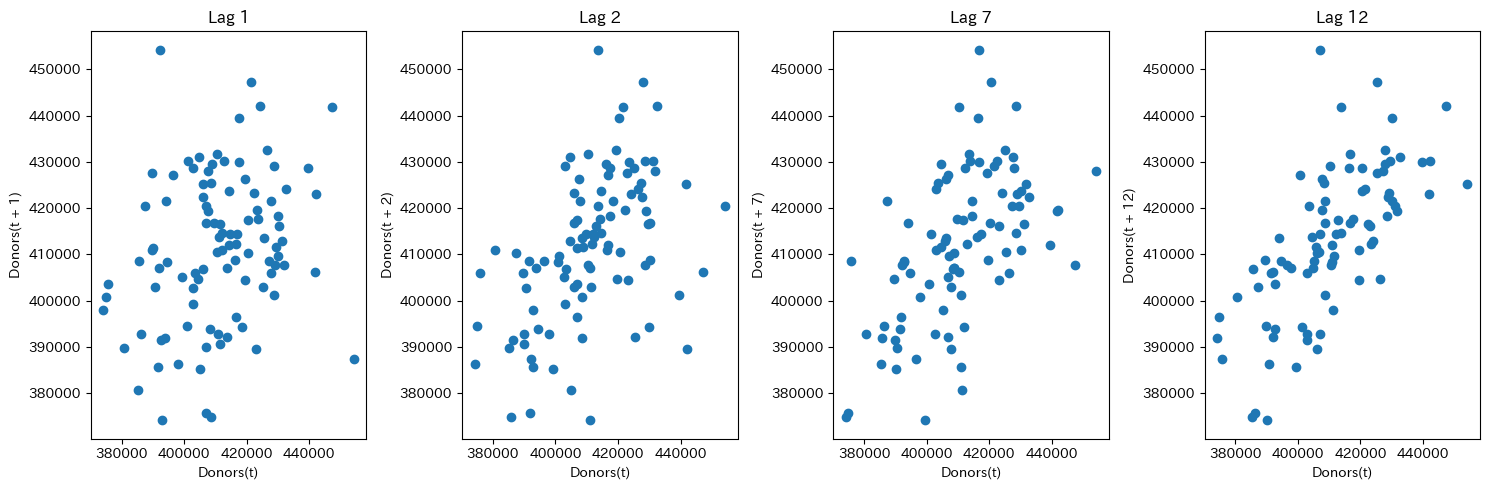

In [15]:
# lag値のリスト
lags = [1, 2, 7, 12]

fig, axes = plt.subplots(nrows=1, ncols=len(lags), figsize=(15, 5))

# 各lagに対してlag_plotを描画
for i, lag in enumerate(lags):
    ax = axes[i] if len(lags) > 1 else axes
    tmp_series = grouped_month_total['blood_donors']
    lag_plot(tmp_series, lag=lag, ax=ax)

    ax.set_title(f'Lag {lag}')
    ax.set_xlabel('Donors(t)')
    ax.set_ylabel(f'Donors(t + {lag})')
    correlation = tmp_series.autocorr(lag=lag) # 相関係数を計算
    print(f'ラグ{lag} 相関係数： {correlation}')

plt.tight_layout()
plt.show()

lag12でやや正の相関がみられる

### 参考にしたサイト等
https://masanori.hateblo.jp/entry/2019/09/25/205109